In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time

from evaluate_models import *
from manipulate_data import *

In [2]:
model_names = ['ARMA', 'LSTM', 'GRU', 'RF']

frequencies = ['D', '60min', '15min', '5min', 'min']
frequencies_number_of_samples = np.multiply([1, 7, 26, 78, 390], 250)

predictions, returns, dates, number_of_study_periods, study_periods = \
            append_periods(model_names, frequencies, frequencies_number_of_samples)

Frequency: D
Frequency: 60min
Frequency: 15min
Frequency: 5min
Frequency: min


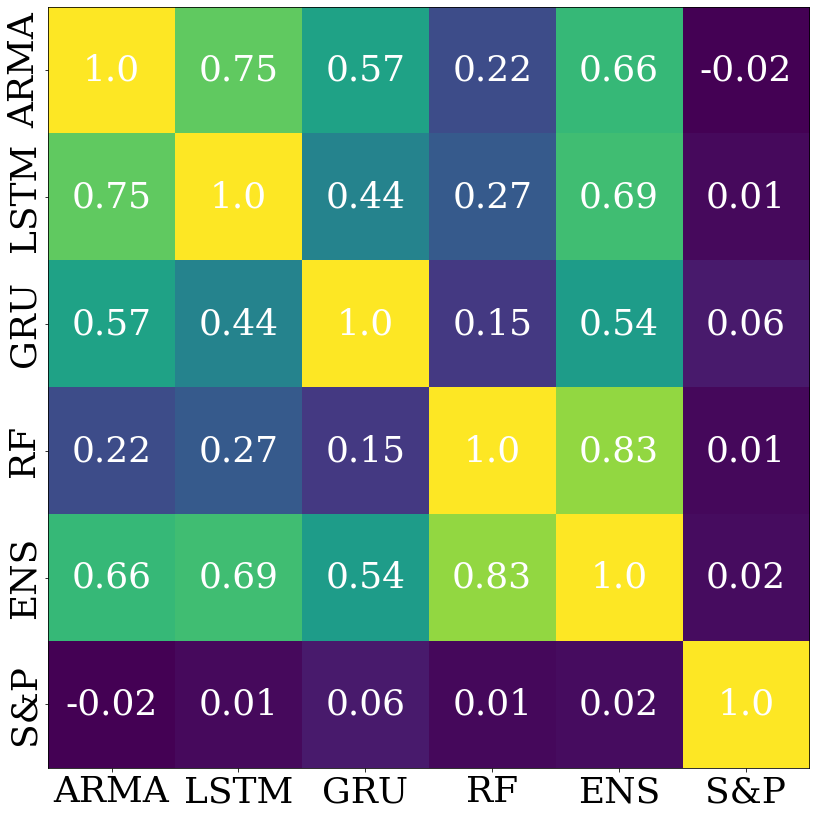

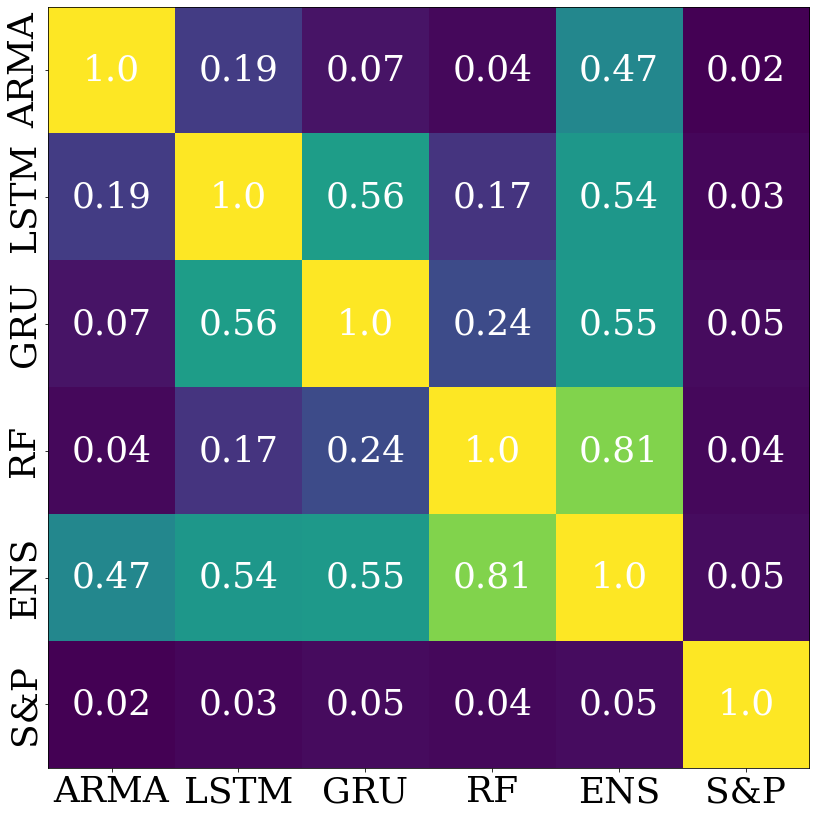

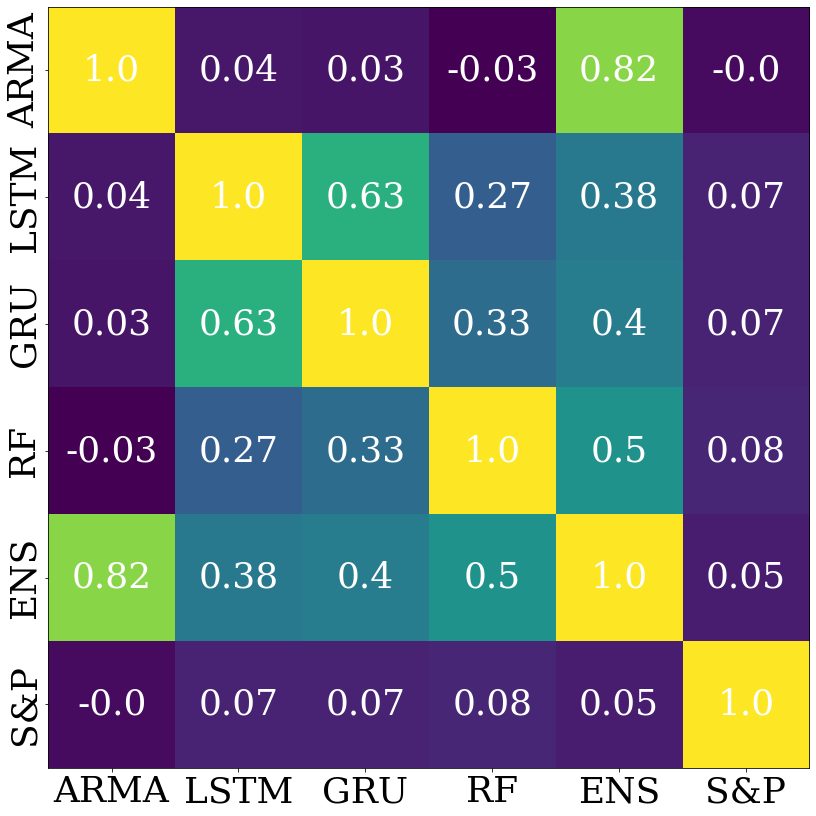

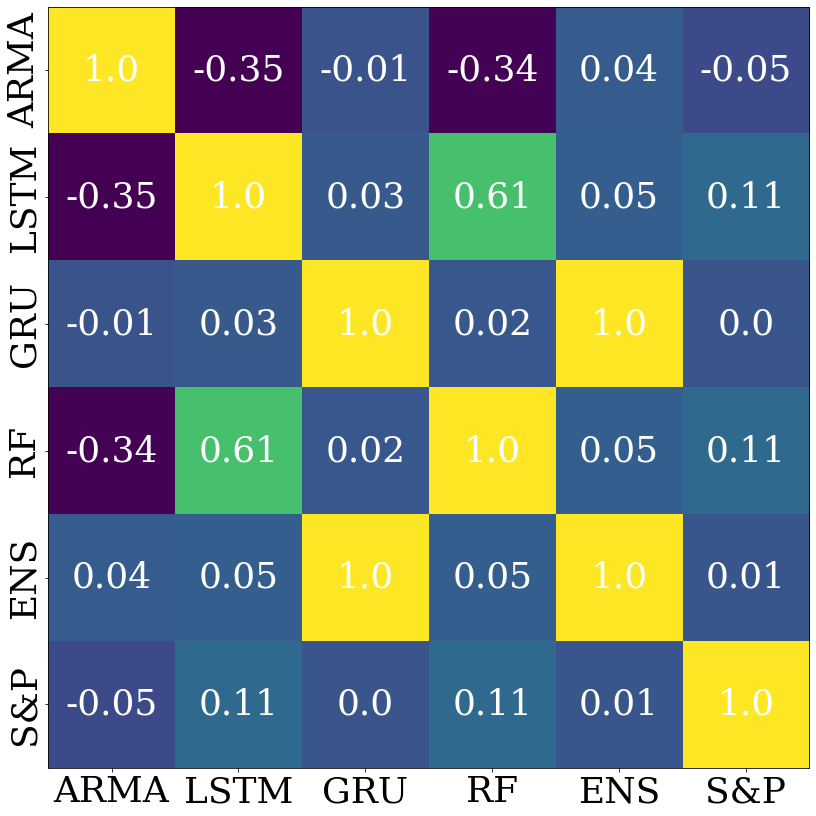

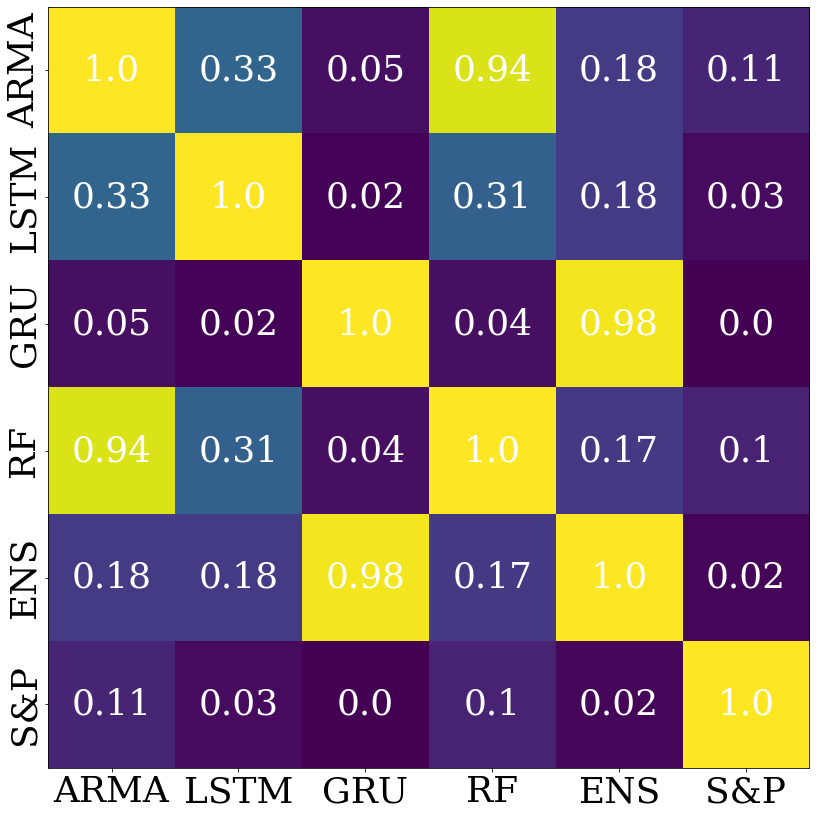

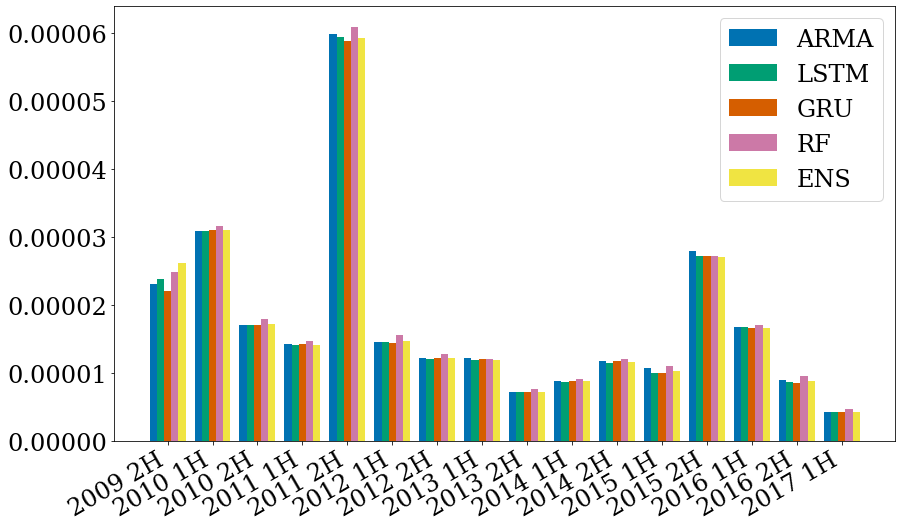

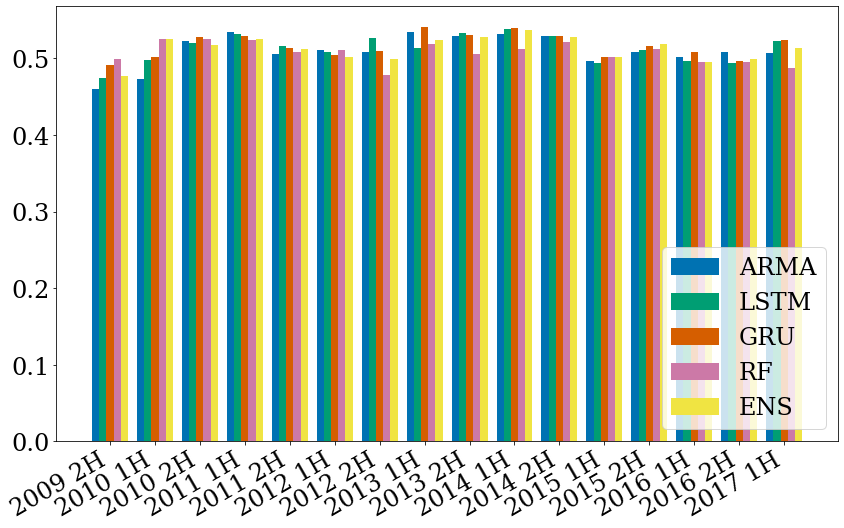

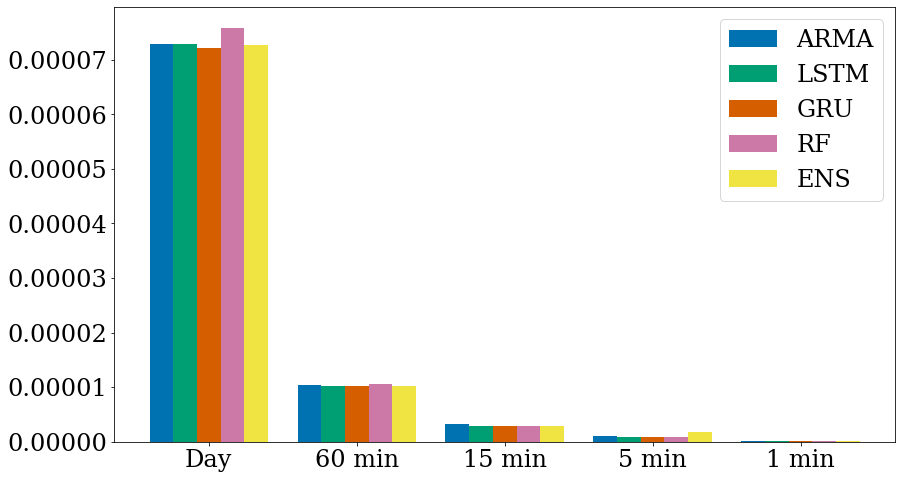

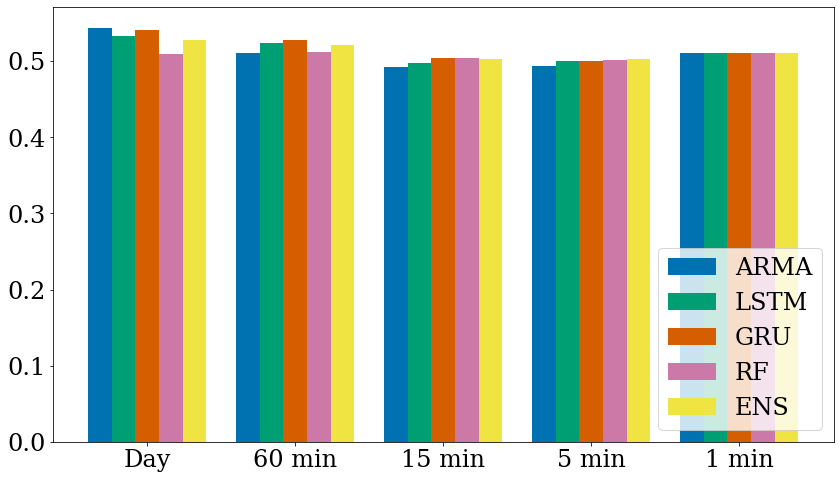

In [3]:
calculate_corr(predictions, returns, model_names)
mse, directional_accuracy = calculate_da_mse(model_names, frequencies, number_of_study_periods, study_periods)
calculate_MCS(predictions, returns, model_names)

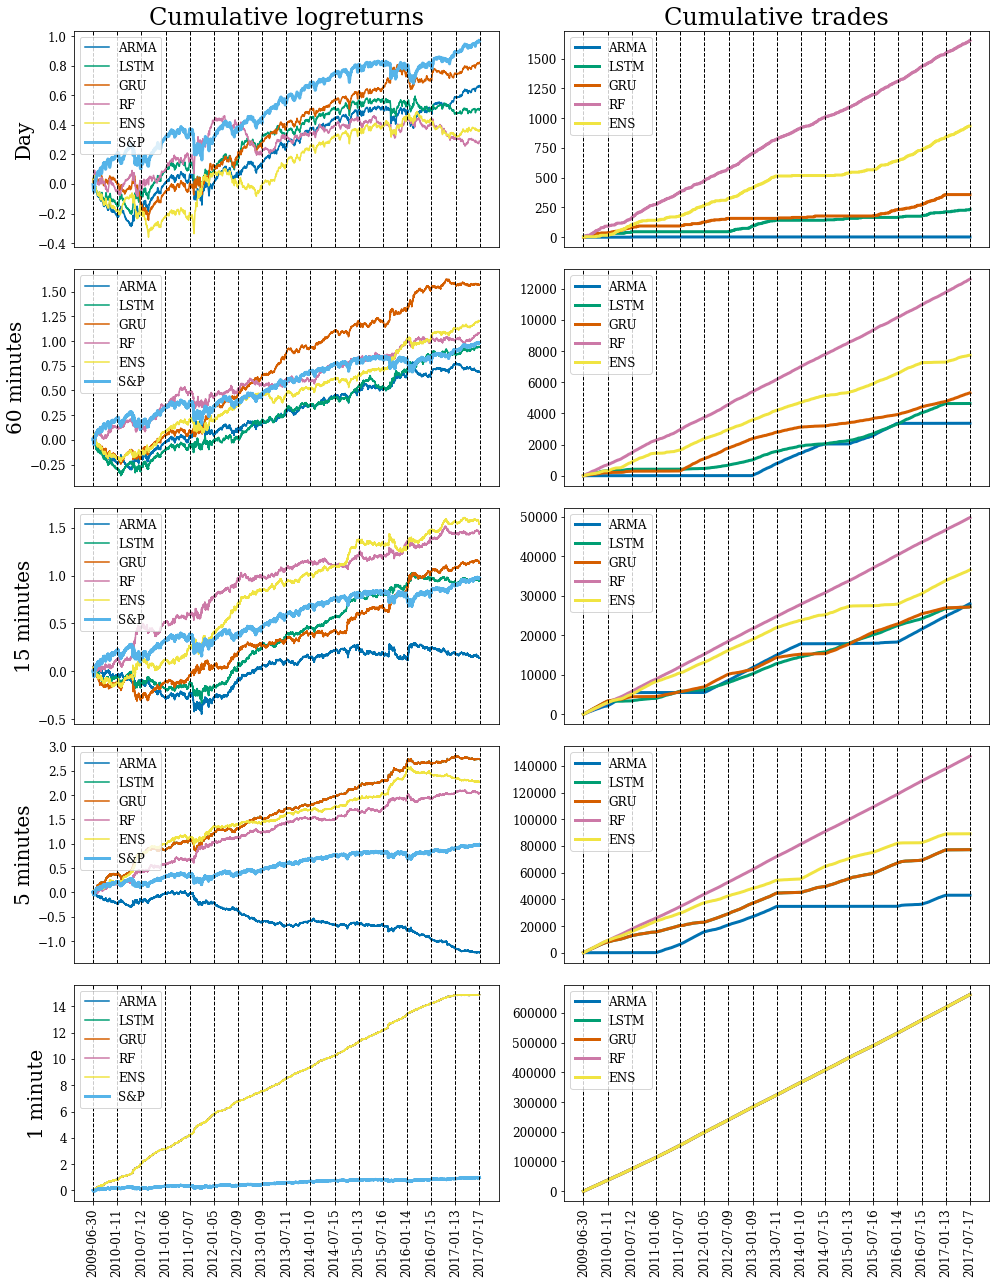

In [4]:
transaction_cost = 0
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost, model_names)
sharpe_ratios = create_sharpe_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)

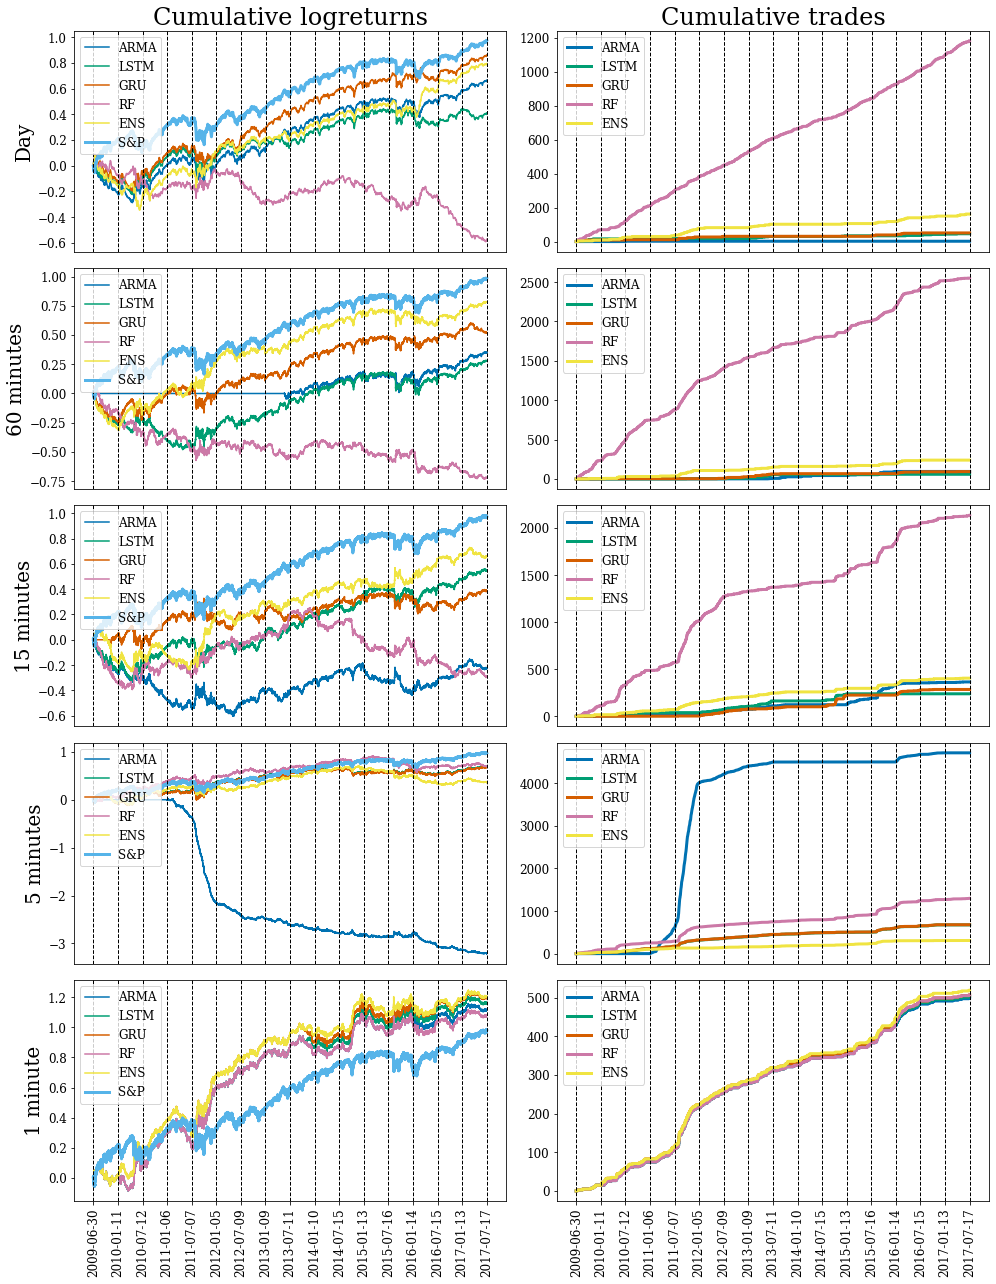

In [5]:
transaction_cost = 0.0005
trading_strategy = calculate_trading_strategy(predictions, transaction_cost)
logr = create_logr(trading_strategy, returns, transaction_cost)
vis_cum_logr(logr, returns, trading_strategy, frequencies, dates, number_of_study_periods, transaction_cost, model_names)
sharpe_ratios = create_sharpe_ratio(logr, returns, transaction_cost, frequencies_number_of_samples, model_names)

In [6]:
print(predictions)

[array([[-1.22828416e-03, -1.22828416e-03, -1.22828416e-03, ...,
         1.77969788e-04,  1.77969788e-04,  1.77969788e-04],
       [-1.98984984e-03, -1.46949384e-03, -7.85172277e-04, ...,
        -1.13759743e-05,  2.73854675e-04,  4.02896432e-04],
       [-9.27678775e-06, -6.78795215e-04, -1.23914424e-03, ...,
         6.17296668e-04,  6.38844911e-04,  6.08189323e-04],
       [-4.01789780e-03, -3.92675606e-03, -2.60777350e-04, ...,
         1.05370847e-03,  4.26909029e-04, -4.20811575e-04],
       [-1.81132715e-03, -1.82583232e-03, -8.78344508e-04, ...,
         4.59399738e-04,  3.79394601e-04,  1.92060992e-04]]), array([[-1.80812019e-04, -1.80812019e-04, -1.80812019e-04, ...,
        -2.28728115e-05, -2.28728115e-05, -2.28728115e-05],
       [-5.16144210e-05, -3.32180993e-04, -4.32708533e-04, ...,
         1.46193430e-04,  1.38243471e-04,  1.32064350e-04],
       [-3.54545249e-04, -3.31772782e-04, -2.24826203e-04, ...,
         6.53118041e-05, -7.16807408e-05,  6.03053195e-05],
     